In [1]:
import os
os.chdir("../")
%pwd

'c:\\Users\\riach\\Projects\\WHO-Life-Expectancy'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [11]:

train_data = pd.read_csv('artifacts/data_transformation/train.csv')
test_data = pd.read_csv('artifacts/data_transformation/test.csv')

Train = train_data.drop('Life expectancy ',axis=1)
Target = train_data['Life expectancy ']
x_test = test_data.drop('Life expectancy ',axis=1)
y_test = test_data['Life expectancy ']

In [13]:
# Create an empty DataFrame for modeling
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])

# Define the model selection function
def select_model(model_name):
    global Modeling  # Access the global DataFrame
    
    # initialize your model object 
    model = model_name
    
    # Fit the model on the training data
    model.fit(Train, Target)
    
    # Calculate the score of the model on the training data
    train_score = model.score(Train, Target)
    print(f"Score of the {model_name} model on the training data is: {train_score}")
    
    # Make predictions on the test data
    predictions = np.round(model.predict(x_test), decimals = 1)
    
    # See R2 score on the test data
    test_r2_score = r2_score(y_test, predictions)
    print(f"R2 score of the {model_name} model on the test data is: {test_r2_score}")
    
    # Create a DataFrame for the current model's scores
    model_scores = pd.DataFrame({'Model': [model_name], 'Training Score': [train_score], 'Test R2 Score': [test_r2_score]})
    
    # Concatenate the model_scores DataFrame with the Modeling DataFrame
    Modeling = pd.concat([Modeling, model_scores], ignore_index = True)


In [14]:
select_model(LinearRegression())

Score of the LinearRegression() model on the training data is: 0.8384655551585507
R2 score of the LinearRegression() model on the test data is: 0.8420072517309976


In [15]:
select_model(SVR(C = 9.0, epsilon = 0.9, kernel = 'rbf'))

Score of the SVR(C=9.0, epsilon=0.9) model on the training data is: 0.9238979364412254
R2 score of the SVR(C=9.0, epsilon=0.9) model on the test data is: 0.9066551203960324


In [16]:
select_model(RandomForestRegressor(n_estimators = 100, max_depth=7, min_samples_split=5))

Score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the training data is: 0.9640243245298873
R2 score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the test data is: 0.9427349894414065


In [17]:
select_model(GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5))

Score of the GradientBoostingRegressor(max_depth=6, min_samples_split=5) model on the training data is: 0.9944892125373238
R2 score of the GradientBoostingRegressor(max_depth=6, min_samples_split=5) model on the test data is: 0.9619028091300525


In [18]:
# rename modle name
names = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'GradientBoostingRegressor']

# loop over list to rename model
for i in range(4):
    Modeling.rename(index = {i : names[i]}, inplace = True)
    
# drop model column
Modeling.drop(columns= "Model", inplace = True)

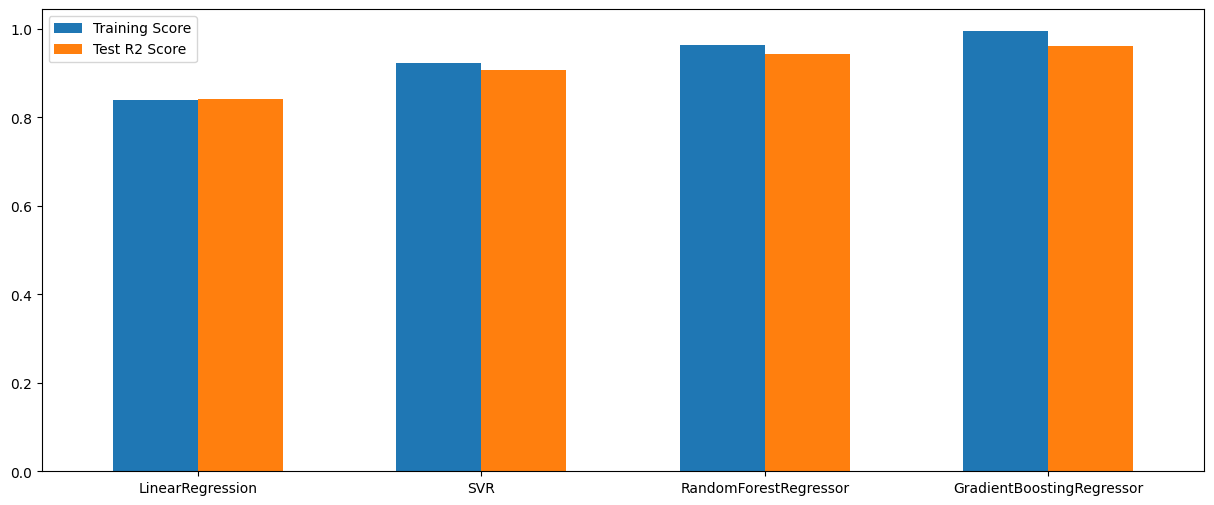

In [20]:
Modeling.plot(kind = "bar", figsize = (15,6), width = 0.6)
plt.xticks(rotation = 0)
plt.show()